In [1]:
!pip install scikit-image
!pip install opencv-python-headless==4.7.0.72
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from skimage.measure import label,regionprops


In [2]:
def preprocess_image(img_path):
    image=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError("Image not found")
    resized_image = cv2.resize(image, (512, 512)) 
    denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    contrast_image = clahe.apply(denoised_image)
    return image,contrast_image,denoised_image

In [3]:
def segment_image(denoised_image):
    _, binary_image=cv2.threshold(denoised_image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

In [4]:
def extract_features(binary_image):
    edges=cv2.Canny(binary_image,50,150)
    labeled_image=label(binary_image)
    properties=regionprops(labeled_image)
    return edges, properties
    

In [5]:
def draw_detection(image,properties):
    output_image=cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
    for prop in properties:
        min_row,min_col,max_row,max_col=prop.bbox
        cv2.rectangle(output_image,(min_col,min_row),(max_col,max_row),(0,255,0),2)
        
        centroid=tuple(map(int,prop.centroid[::-1]))
        cv2.circle(output_image,centroid,5,(0,0,255),-1)
        
    return output_image

In [8]:
def main(image_path):
    orginal_image,contrast,blur=preprocess_image(image_path)
    binary_image=segment_image(blur)
    edges,properties=extract_features(binary_image)
    output=draw_detection(orginal_image,properties)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1),plt.imshow(orginal_image,cmap='gray'),plt.title("Orginal Image")
    plt.subplot(2,2,2),plt.imshow(blur,cmap='gray'),plt.title("Blurred Image")
    plt.subplot(2,2,3),plt.imshow(binary_image,cmap='gray'),plt.title("Binary Image")
    plt.subplot(2,2,4),plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB)),plt.title("Detected Image")
    plt.tight_layout()
    plt.show()

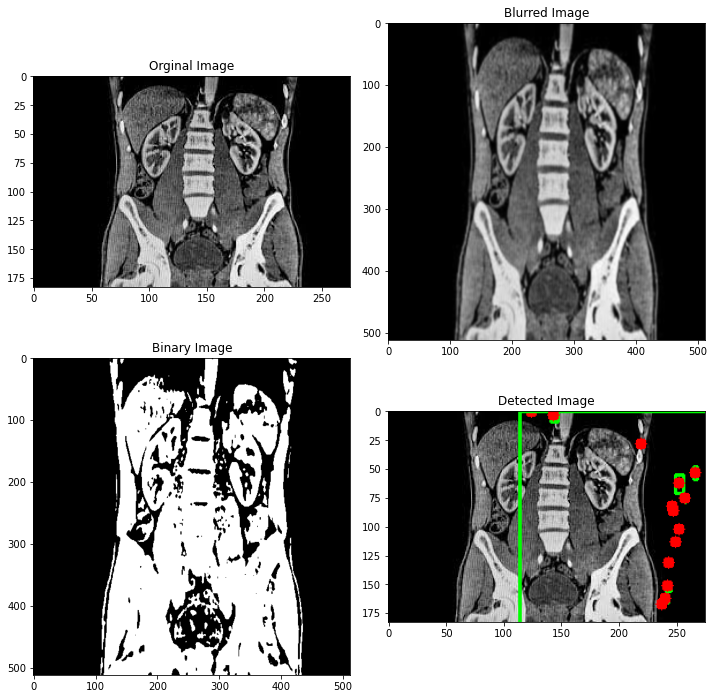

In [28]:
main(img_path)

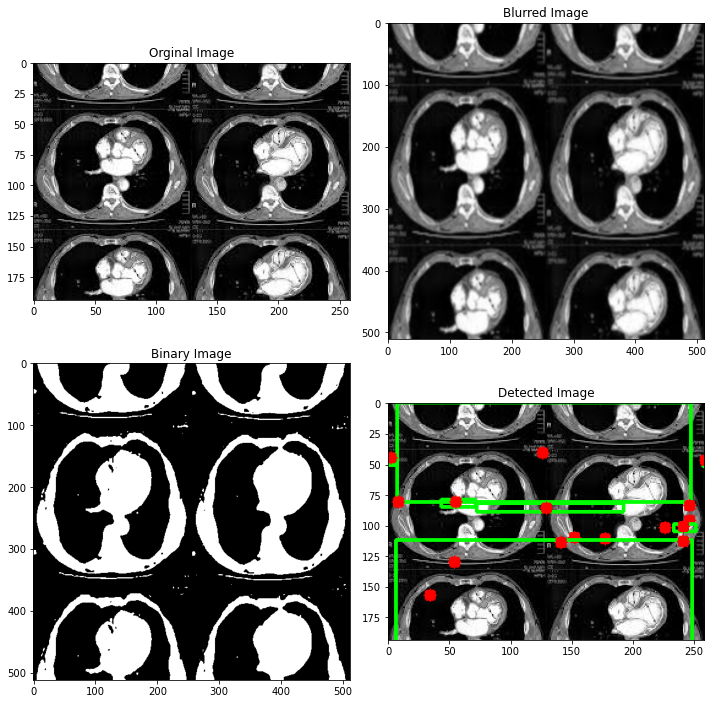

In [9]:
path='img2.jpeg'
main(path)